<a href="https://colab.research.google.com/github/erikanfox/NLP-low-code/blob/main/lowcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest Data

In [ ]:
!wget https://raw.githubusercontent.com/efoxcolgate/NLP-low-code/main/Frankenstein-book
!wget https://raw.githubusercontent.com/efoxcolgate/NLP-low-code/main/Mathilda-book
!wget https://raw.githubusercontent.com/efoxcolgate/NLP-low-code/main/greatgatsby-book

--2021-09-30 20:33:54--  https://raw.githubusercontent.com/efoxcolgate/NLP-low-code/main/Frankenstein-book
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 421119 (411K) [text/plain]
Saving to: ‘Frankenstein-book’

Frankenstein-book   100%[===================>] 411.25K  --.-KB/s    in 0.04s   

2021-09-30 20:33:54 (11.2 MB/s) - ‘Frankenstein-book’ saved [421119/421119]

--2021-09-30 20:33:55--  https://raw.githubusercontent.com/efoxcolgate/NLP-low-code/main/Mathilda-book
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238672 (233K)

In [ ]:
!wget https://raw.githubusercontent.com/efoxcolgate/NLP-low-code/main/tur

--2021-09-30 20:33:56--  https://raw.githubusercontent.com/efoxcolgate/NLP-low-code/main/tur
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8945 (8.7K) [text/plain]
Saving to: ‘tur’

tur                 100%[===================>]   8.74K  --.-KB/s    in 0s      

2021-09-30 20:33:56 (64.4 MB/s) - ‘tur’ saved [8945/8945]



In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
from pathlib import Path
import spacy

In [ ]:
nlp=spacy.load("en_core_web_lg")

In [ ]:
txtFrank=nlp(Path('Frankenstein-book').read_text())
txtMath=nlp(Path('Mathilda-book').read_text())
txtgatsby=nlp(Path('greatgatsby-book').read_text())

In [ ]:
txttur=nlp(Path('tur').read_text())

In [ ]:
txtFrank.similarity(txtMath)

0.9974649158706187

In [ ]:
txtFrank.similarity(txtgatsby)

0.9872751201867247

In [ ]:
txtMath.similarity(txtgatsby)

0.9868334936300606

In [ ]:
txtFrank.similarity(txtFrank)

1.0

In [ ]:
txttur.similarity(txtFrank)

0.1710003942138613

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!python -m textblob.download_corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [ ]:
# remove stop words
from textblob import TextBlob
from nltk.corpus import stopwords

In [ ]:
stop_words=stopwords.words("english")
frank_blob=TextBlob(Path('Frankenstein-book').read_text())
math_blob=TextBlob(Path('Mathilda-book').read_text())
gg_blob=TextBlob(Path('greatgatsby-book').read_text())

In [ ]:
fran_count= frank_blob.word_counts.items()
math_count=math_blob.word_counts.items()
gg_count=gg_blob.word_counts.items()

In [ ]:
len(fran_count)

7165

In [ ]:
len(math_count)

5335

In [ ]:
len(gg_count)

6244

In [ ]:
def remove_stop(words):
  no_stop = []
  for word in words:
    if word[0] not in stop_words:
      no_stop.append(word[0])
  return no_stop

In [ ]:
no_stop_fran= remove_stop(fran_count)
no_stop_math= remove_stop(math_count)
no_stop_gg= remove_stop(gg_count)


In [ ]:
len(no_stop_fran)

7036

In [ ]:
len(no_stop_math)

5204

In [ ]:
len(no_stop_gg)

6098

In [ ]:
no_stop_fran[0:5]

['zelda', 'wear', 'gold', 'hat', 'move']

In [ ]:
from wordcloud import  WordCloud
word_cloud_fran=str1 = ' '.join(no_stop_fran)
wordcloudfran=WordCloud().generate(word_cloud_fran)

(-0.5, 399.5, 199.5, -0.5)

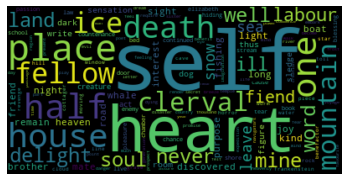

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(wordcloudfran,interpolation='bilinear')
plt.axis("off")

In [ ]:
from pandas import DataFrame
df = DataFrame(no_stop_fran,columns=["fran-words"])
df.head()

,fran-words
0,letter
1,1
2,mrs
3,saville
4,england


In [ ]:
df.to_csv("fran-words.txt",index=False)